In [1]:
import glob
import os
import re

import h5py
import numpy as np
import pandas as pd
import pybedtools
from scipy.stats import pearsonr, spearmanr, wilcoxon, ttest_rel
from sklearn.metrics import roc_auc_score, average_precision_score

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.25, style='ticks')


In [2]:
#Define folders with SNP predictions

borzoi_dir = '/home/drk/seqnn/data/models/v2'
borzoi_etql_dir = '%s/ensemble/gtexu' % borzoi_dir

enform_eqtl_dir = '/home/drk/attn/analysis/2020/8-13/dm37_out'


In [5]:
#Load Borzoi AUROC scores

borzoi_auroc = {}
pattern = r"/([^/]+)_class"

#Loop over files
for stats_file in glob.glob('%s/*_class-logD2/stats.txt' % borzoi_etql_dir):
    tissue = re.search(pattern, stats_file).group(1)
    
    #Load file and extract score
    with open(stats_file, 'r') as stats_open:
        borzoi_auroc[tissue] = float(stats_open.readline().split()[1])

len(borzoi_auroc)


49

In [6]:
#Load Enformer AUROC scores

enform_auroc = {}

#Loop over files
for stats_file in glob.glob('%s/*_class-sad/stats.txt' % enform_eqtl_dir):
    tissue = stats_file.split('/')[-2][:-10]
    
    #Load file and extract score
    with open(stats_file, 'r') as stats_open:
        enform_auroc[tissue] = float(stats_open.readline().split()[1])

len(enform_auroc)


49

In [7]:
#Define list of unique tissues

tissues = sorted(set(borzoi_auroc.keys()) & set(enform_auroc.keys()))
len(tissues)


49

In [8]:
#Sort scores for both models

borzoi_auroc = np.array([borzoi_auroc[tissue] for tissue in tissues])
enform_auroc = np.array([enform_auroc[tissue] for tissue in tissues])


Ttest_relResult(statistic=-28.548543038935538, pvalue=9.042140044008052e-32)


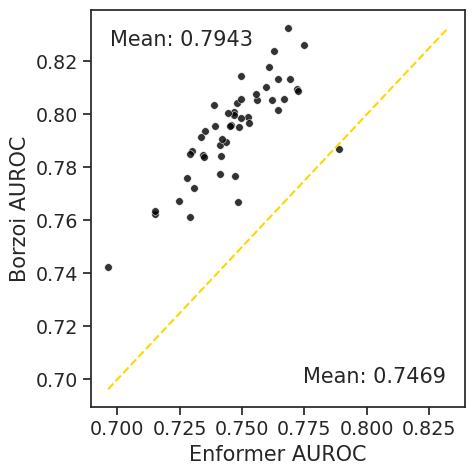

In [10]:
#Plot AUROCs (Borzoi vs Enformer)

print(ttest_rel(enform_auroc, borzoi_auroc))

plt.figure(figsize=(5,5))
g = sns.scatterplot(x=enform_auroc, y=borzoi_auroc,
                    color='black', s=30, alpha=0.8)

g.text(0.05, 0.95, 'Mean: %.4f' % borzoi_auroc.mean(), 
                horizontalalignment='left', verticalalignment='top',
                transform=g.transAxes)
g.text(0.95, 0.05, 'Mean: %.4f' % enform_auroc.mean(), 
                horizontalalignment='right', verticalalignment='bottom',
                transform=g.transAxes)

vmin = min(enform_auroc.min(), borzoi_auroc.min())
vmax = max(enform_auroc.max(), borzoi_auroc.max())
g.plot([vmin,vmax], [vmin,vmax], color='gold', linestyle='--')

g.set_xlabel('Enformer AUROC')
g.set_ylabel('Borzoi AUROC')
plt.tight_layout()
plt.savefig('eqtl_scatter.png')
